In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('data/dfmerged.csv')
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [3]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,33819106.0,1.710566e+06,987400.761933,1.0,855413.0,1710660.0,2565587.0,3421083.0
user_id,33819106.0,1.029444e+05,59467.333955,1.0,51435.0,102626.0,154412.0,206209.0
order_number,33819106.0,1.713998e+01,17.498287,1.0,5.0,11.0,24.0,100.0
order_dow,33819106.0,2.737285e+00,2.093296,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,33819106.0,1.343123e+01,4.246149,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,31741038.0,1.136415e+01,8.940500,0.0,5.0,8.0,15.0,30.0
product_id,33819106.0,2.557551e+04,14097.696774,1.0,13519.0,25256.0,37935.0,49688.0
add_to_cart_order,33819106.0,8.367738e+00,7.139540,1.0,3.0,6.0,11.0,145.0
reordered,33819106.0,5.900617e-01,0.491822,0.0,0.0,1.0,1.0,1.0
aisle_id,33819106.0,7.121799e+01,38.198982,1.0,31.0,83.0,107.0,134.0


## Main Insights From DataFrame Overview  

**The merged data frame of all the orders includes:**
* Order numbers ranging from 1 to 100
* Days between orders range from 5 to 30
* Number of items in order max out at 145 
* There are 134 aisles and 21 departments 
* Total of 33,819,106 entries and 15 columns 
* On average 59% of orders are reorders

## Objective 

Since we are aiming to predict the probability of a customer ordering a particular product in future orders there are a few variables that are of concern here. 

* <b>User</b> describe user characteristics, their ordering pattern, what percent of their orders are reorders
* <b>Product</b> describe the characteristics of a product, it's reorder percentage, total number of orders, department
* <b>User and Product</b> describe a user's behavior towards particular products, which products do they reorder the most, out of all their orders how often is a product ordered

These variables will be used as the predictors to determine the contents of future baskets. Before we dive into these variables, I will first explore the data to get a sense of how columns are distributed and the relationships between them. 


## 1.1.1 : Product Distribution By Type 

I will begin the EDA process by getting an understanding of the products available, their total orders, the percent reorder, and total reorders. 


In [6]:
product_info = df.groupby('product_id')['reordered'].sum().to_frame('p_total_reorders')
purchases = df.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
product_info = product_info.merge(purchases, on = 'product_id', how= 'left').fillna(0)
product_info['percent_reorder'] = product_info['p_total_reorders']/product_info['p_total_purchases']

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'p_total_reorders'),
  Text(0, 1.5, 'p_total_purchases'),
  Text(0, 2.5, 'percent_reorder')])

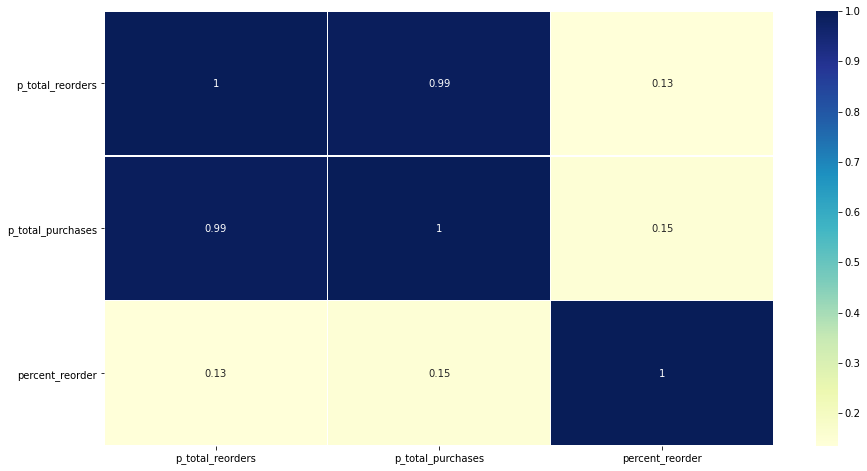

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(product_info.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

In the plot below, we can see that total purchases are correlated with total reorders, which makes sense.

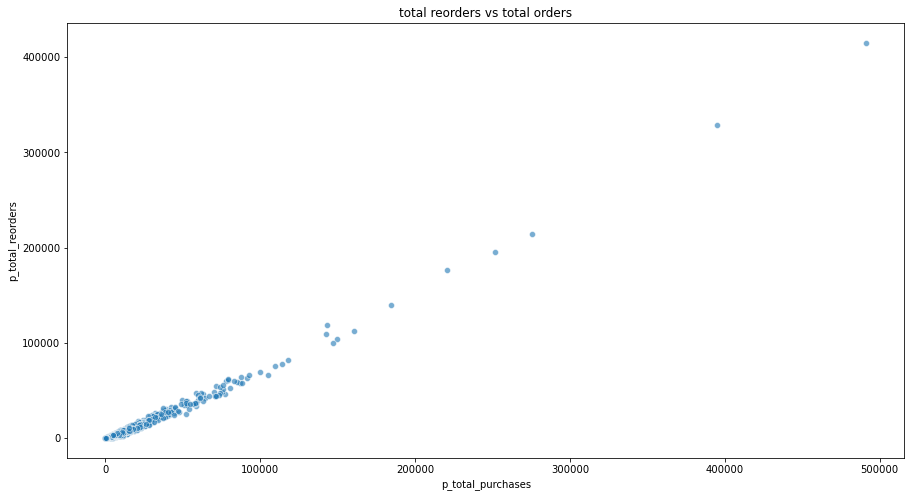

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot('p_total_purchases', 'p_total_reorders', data =product_info, alpha = .6)
plt.xlabel('p_total_purchases')
plt.ylabel('p_total_reorders')
plt.title('total reorders vs total orders')
plt.show()

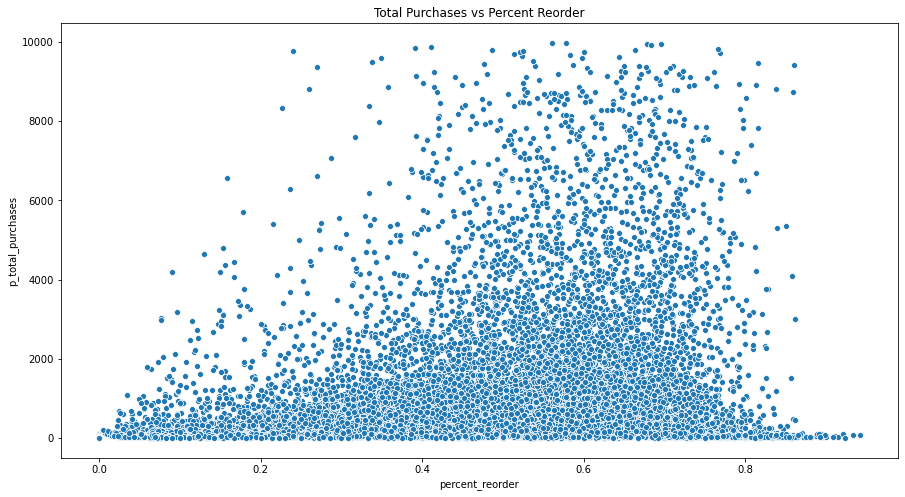

In [12]:
product_info_mod = product_info.loc[product_info['p_total_purchases']< 10000]
plt.figure(figsize=(15,8))
sns.scatterplot( 'percent_reorder','p_total_purchases', data =product_info_mod)
plt.xlabel('percent_reorder')
plt.ylabel('p_total_purchases')
plt.title('Total Purchases vs Percent Reorder')
plt.show()

We cannot see such a clear relationship between total purchases and reorder ratio of each product. 

## 1.1.2 Product Reorder Distribution By Time 

Here I would like to explore the relationship of time between purchases and the reorder ratio to see if the time between orders changes the likelihood of a reorder. 

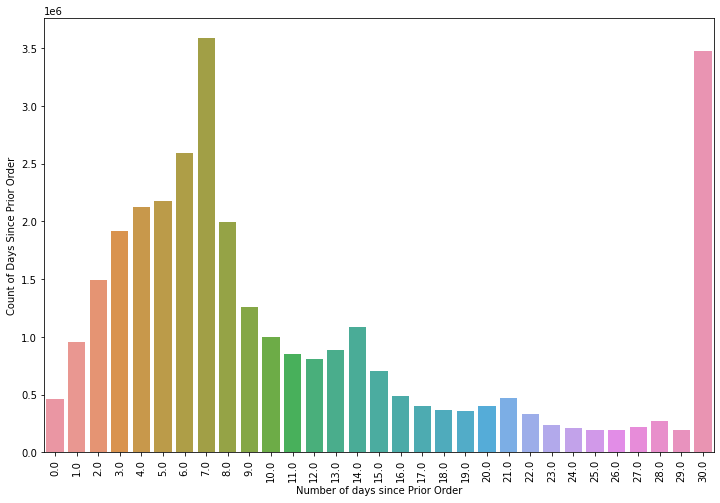

In [13]:
plt.figure(figsize = (12, 8) )
sns.countplot(x = 'days_since_prior_order', data = df)
plt.xlabel('Number of days since Prior Order')
plt.ylabel('Count of Days Since Prior Order')
plt.xticks(rotation = 'vertical')
plt.show()

**Interesting Notes**

Looks like the majority of customers order on a monthly basis, every 30 days or on a weekly 7 day pattern. It is surprising to see how many orders are happening within a week of the last order. After seeing this frequency distribution it would be interesting to see the average ratio of reorders by day since prior order. 

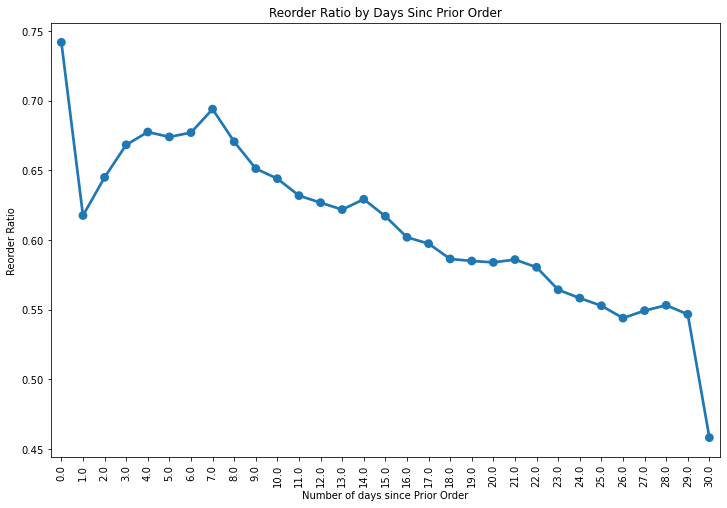

In [14]:
fig = plt.figure(figsize = (12, 8) )
days_reorder = df.groupby('days_since_prior_order')['reordered'].mean().reset_index()
sns.pointplot('days_since_prior_order','reordered', data = days_reorder )
plt.xlabel('Number of days since Prior Order')
plt.ylabel('Reorder Ratio')
plt.title('Reorder Ratio by Days Sinc Prior Order')
plt.xticks(rotation = 'vertical')
fig.savefig('ratiovsdaysbtworder.png')
plt.show()


**Interesting Notes**

This is interesting to see that the ratio of reordered products in baskets steadily decreases the longer it is between the last order. It does make sense, however, since if a product is reordered often it must be the case that it is reordered sooner than items that have a low reorder percentage. 

There is also a small spike at 7 days which also makes sense since items that people need on a weekly basis are generally reorders. 

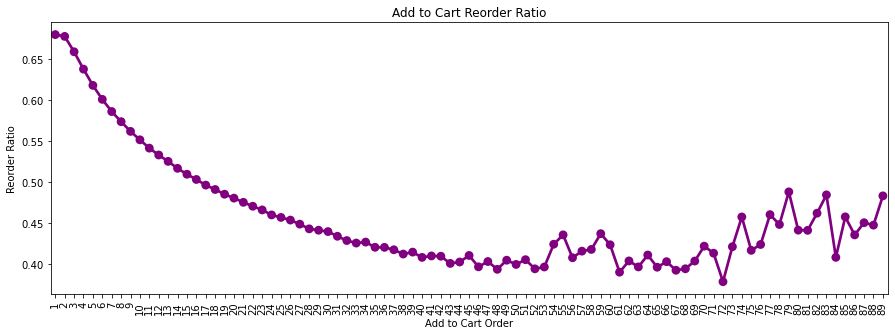

In [15]:
add_to_cart_reorder = df.groupby('add_to_cart_order')['reordered'].aggregate('mean').reset_index()
add_to_cart_reorder = add_to_cart_reorder.loc[add_to_cart_reorder['add_to_cart_order'] < 90]
plt.figure(figsize=(15,5))
sns.pointplot(add_to_cart_reorder['add_to_cart_order'].values, add_to_cart_reorder['reordered'].values, color = 'purple', alpha =.4)
plt.xlabel('Add to Cart Order')
plt.ylabel('Reorder Ratio')
plt.title('Add to Cart Reorder Ratio')
plt.xticks(rotation ='vertical')
plt.show()


**Interesting Notes**

The reorder ratio steadily decreases as more items get added to the cart. This makes sense since people are most likely to order the items they need most often first. It is good to note that the likelihood of reorder from past items is highest at the start of a customers order. 

## 1.1.3 Exploring the User Reorder Distribution

Next I will explore the user ordering pattern to see how it can be used as a predictor for future reorders. 

In [16]:
user_reorder = df.groupby('user_id')['reordered'].sum()
user_orders = df.groupby('user_id')['order_number'].max().to_frame('total_orders')
user_products = df.groupby('user_id')['order_id'].count().to_frame('total_products')
user_info  = pd.merge(user_reorder, user_orders, on = 'user_id', how='inner')
user_info = user_info.merge(user_products, on = 'user_id', how = 'inner')
user_info['average_order_size'] = round(user_info['total_products'] / user_info['total_orders'],2)
user_info['average_reorder'] = round(user_info['reordered'] / user_info['total_products'],2)
user_info.reset_index().head()


,user_id,reordered,total_orders,total_products,average_order_size,average_reorder
0,1,51,11,70,6.36,0.73
1,2,105,15,226,15.07,0.46
2,3,55,12,88,7.33,0.62
3,4,1,5,18,3.60,0.06
4,5,18,5,46,9.20,0.39


In [17]:
user_info.describe()

,reordered,total_orders,total_products,average_order_size,average_reorder
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,96.772498,16.226658,164.004025,9.984529,0.444333
std,160.293373,16.662238,206.014923,5.840857,0.206297
min,0.000000,3.000000,3.000000,1.000000,0.000000
25%,13.000000,6.000000,44.000000,5.780000,0.290000
50%,37.000000,10.000000,90.000000,9.000000,0.440000
75%,106.000000,20.000000,196.000000,13.000000,0.600000
max,3275.000000,100.000000,3725.000000,60.500000,0.990000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'reordered'),
  Text(0, 1.5, 'total_orders'),
  Text(0, 2.5, 'total_products'),
  Text(0, 3.5, 'average_order_size'),
  Text(0, 4.5, 'average_reorder')])

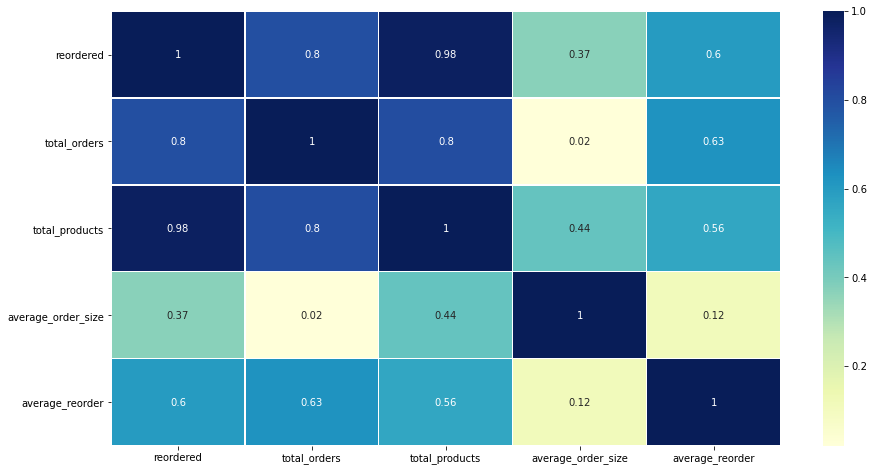

In [18]:
user_info.reset_index()
plt.figure(figsize=(15,8))
sns.heatmap(user_info.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

We can see that there is a correlation between the user's average reorder ratio and their total number of orders. Let's plot it below to see what that looks like.

In [19]:

plt.figure(figsize=(12,8))
sns.scatterplot(x = 'average_reorder', y ='average_order_size', size ='total_orders', data = user_info)
plt.title('Average Reorder Vs Average Order Size ')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 864x576 with 1 Axes>

**Interesting Note**

This shows that the customers who order a lot, also reorder a lot. But you don't see the same relationship with average order size and total order number. This means that average order size does not necessarily increase with customers as they continue to order. 


In the figure below you can see there is a slight positive correlation between average reorder and total orders. 

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'average_reorder', y ='total_orders', size ='average_order_size', data = user_info)
plt.title('Average Reorder Vs Average Order Size ')
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 864x576 with 1 Axes>

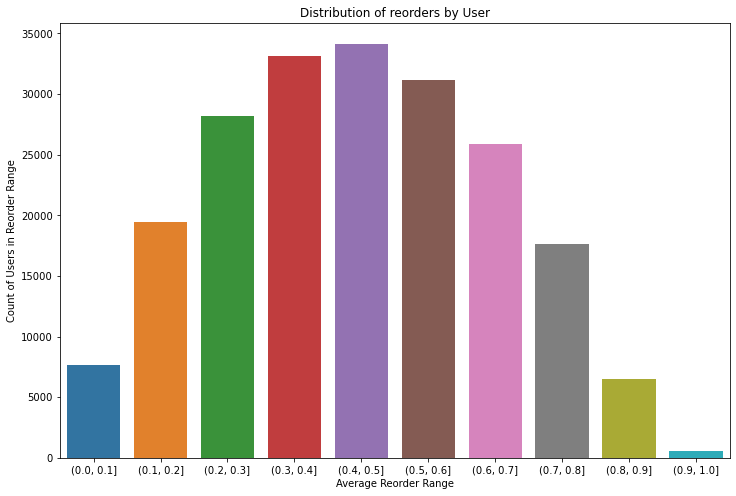

In [21]:
user_info['cut'] = pd.cut(user_info.average_reorder, bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
group = user_info.reset_index()
group = group.groupby('cut')['user_id'].count().reset_index()
fig = plt.figure(figsize=(12, 8))
sns.barplot(x = 'cut', y ='user_id', data = group)
plt.xlabel("Average Reorder Range")
plt.ylabel('Count of Users in Reorder Range')
plt.title('Distribution of reorders by User')
fig.savefig('reordersbyuser.png')
plt.show()

Here you can see the majority of customers have a reorder ratio between .3 and .6 and it resemble a normal distribution. 

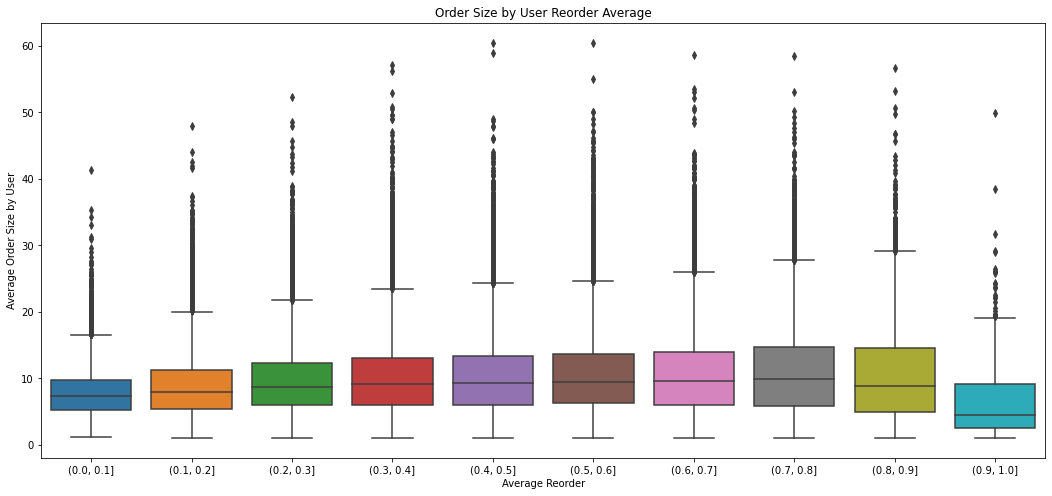

In [22]:
group1 = user_info.groupby(['cut', 'user_id'])['average_order_size']
fig = plt.figure(figsize = (18,8))
sns.boxplot('cut' ,'average_order_size', data = user_info)
plt.xlabel('Average Reorder')
plt.ylabel('Average Order Size by User')
plt.title('Order Size by User Reorder Average')
fig.savefig('ordersizebyreorder.png')
plt.show()

This is interesting to see that the average order size is increasing until the reorder ratio gets to about .7-.8 and then it decreases a bit. This shows that, for the most part as order size increases so does the reorder ratio by the user. This was not so clear in the previous scatterplots but is clearer here. 

Customers that order more frequently and/or have larger order sizes tend to reorder more frequently as well. 


## 1.2.1 Correlation Heatmap

Below is a Correlation Heatmap of all the variables in all the main dataframe and both the user and product subsets where I calculated more variables.

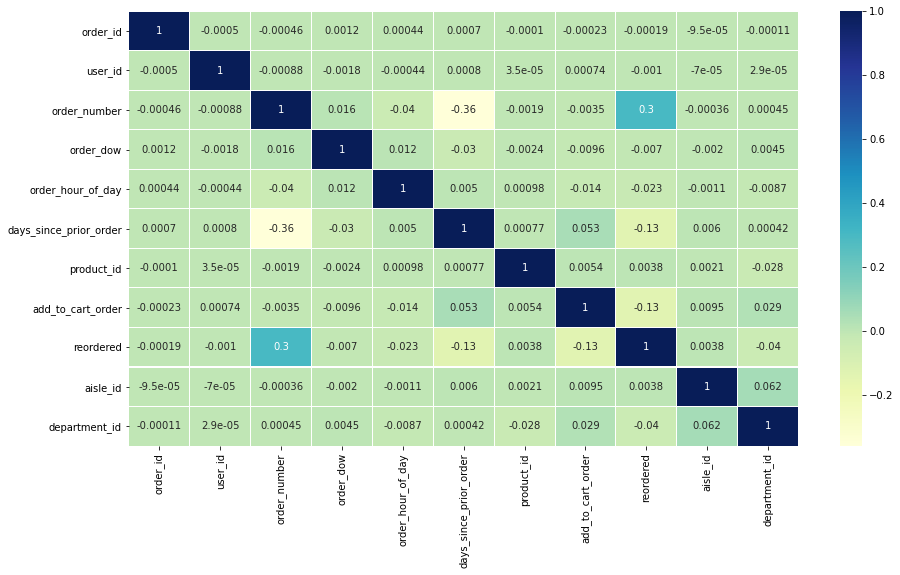

In [23]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.show()
fig.savefig('totaldfheatmap.png')

This shows the relationship of almost perfect correlation between total purchases and total reorders that we plotted before as well as the slight correlation between total purchases and percent reorders. 

### Predictor Variables

In the following graphs we are using the table of predictor variables to explore the relationship between the features we will use to predict our y variable. 

In [24]:
df_pred = pd.read_csv('data/predictor_df.csv')
df_pred.head()


,user_id,reordered,days_since_prior_order,total_orders,total_bought,up_reorder_ratio,avg_days_btw_order,percent_reorder
0,1,1,14.0,11,11,1.000000,19.000000,0.777843
1,1,1,14.0,11,10,1.000000,19.000000,0.715610
2,1,1,14.0,11,4,0.400000,19.750000,0.661117
3,1,1,14.0,11,9,1.000000,19.444444,0.740364
4,1,1,14.0,11,3,0.272727,14.500000,0.540429


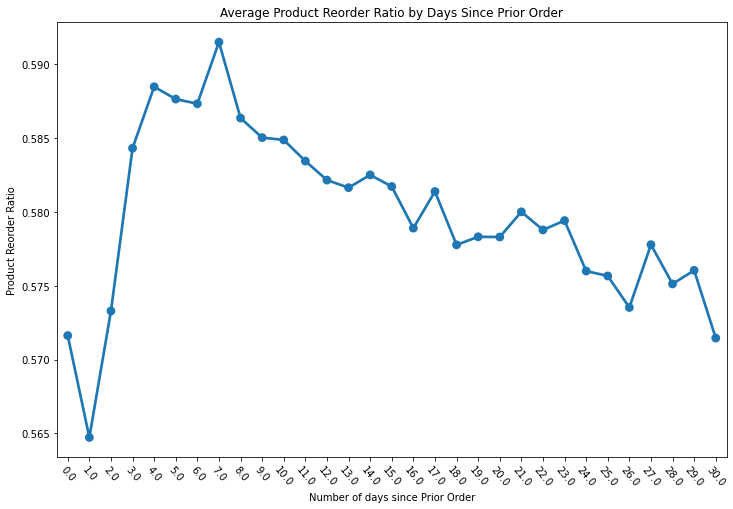

In [25]:
fig = plt.figure(figsize = (12, 8) )
days = df_pred.groupby('days_since_prior_order')['percent_reorder'].mean().reset_index()
sns.pointplot('days_since_prior_order','percent_reorder', data = days )
plt.xlabel('Number of days since Prior Order')
plt.ylabel('Product Reorder Ratio')
plt.title('Average Product Reorder Ratio by Days Since Prior Order')
plt.xticks(rotation = -50)
fig.savefig('productratiovsdaysbtworder.png')
plt.show()

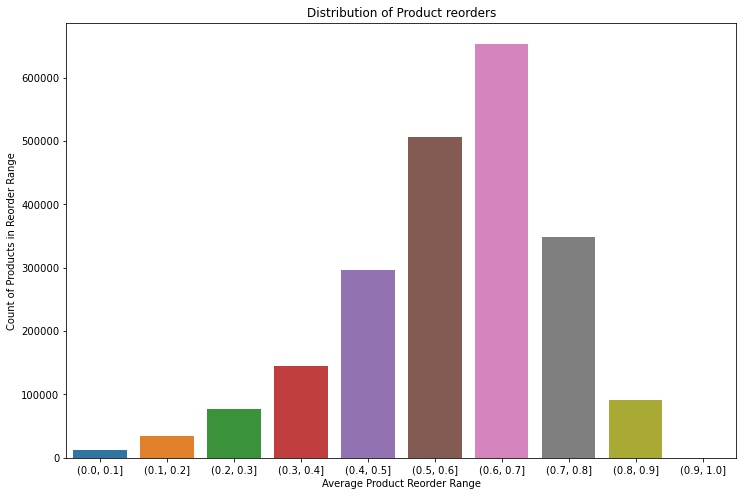

In [26]:
df_pred['cut'] = pd.cut(df_pred.percent_reorder, bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
group1 = df_pred.reset_index()
group1 = group1.groupby('cut')['user_id'].count().reset_index()
fig = plt.figure(figsize=(12, 8))
sns.barplot(x = 'cut', y ='user_id', data = group1)
plt.xlabel("Average Product Reorder Range")
plt.ylabel('Count of Products in Reorder Range')
plt.title('Distribution of Product reorders')
fig.savefig('reordersbyproduct.png')
plt.show()

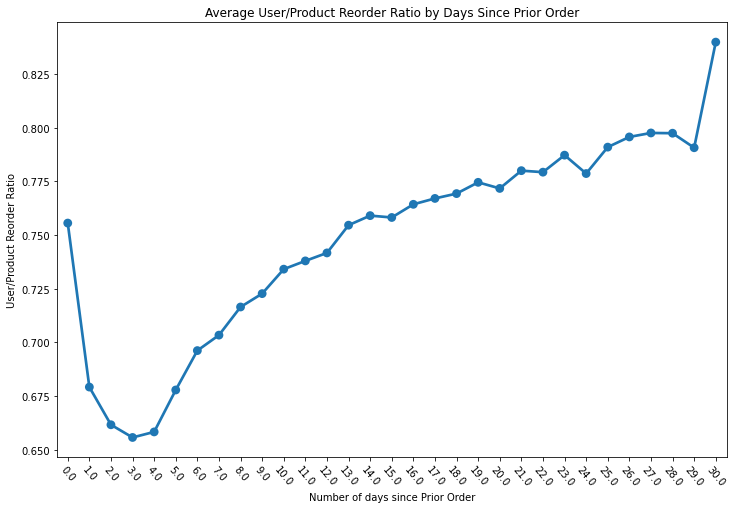

In [27]:
fig = plt.figure(figsize = (12, 8) )
days = df_pred.groupby('days_since_prior_order')['up_reorder_ratio'].mean().reset_index()
sns.pointplot('days_since_prior_order','up_reorder_ratio', data = days )
plt.xlabel('Number of days since Prior Order')
plt.ylabel('User/Product Reorder Ratio')
plt.title('Average User/Product Reorder Ratio by Days Since Prior Order')
plt.xticks(rotation = -50)
fig.savefig('upratiovsdaysbtworder.png')
plt.show()


We can see that as the time increases between orders, the user/product reorder ratio also increases. This shows that people are generally more likely to reorder a product the longer it is from the last order. It is interesting that the product reorder ratio does not increase with time in between orders, but actually looks as though it decreases over time. 

Below, we plot the relationship of each predictor variable to the dependent variable in boxplots.

In [ ]:
X_col =['user_id', 'days_since_prior_order', 'total_orders',
        'up_reorder_ratio', 'avg_days_btw_order',
       'percent_reorder']

fig = plt.figure(figsize= (15,10))
for col, num in zip (X_col, range( 1,len(X_col))):
    plt.subplot(2,3,num)
    sns.boxplot(y = col , x ='reordered', data = df)
    plt.title(col)
fig.savefig('featureboxplots.png')            
plt.show()

We want to make sure that each of our predictor variables will not misinform our models.